In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline
dpi = matplotlib.rcParams['figure.dpi']
from Warcs_removal import get_hierSeg_WSarcs_arcRemove

In [2]:
from skimage.morphology import diamond,square
def morphoFilter(image,oper): 
    if oper[2]=='s':
        kernel=square(int(oper[1]))
    elif oper[2]=='d':
        kernel=diamond(int(oper[1]))
    
    if oper[0]=='E':
        return cv2.morphologyEx(image, cv2.MORPH_ERODE, kernel)
    elif oper[0]=='D':
        return cv2.morphologyEx(image, cv2.MORPH_DILATE, kernel)
    elif oper[0]=='O':
        return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    elif oper[0]=='C':
        return cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    elif oper[0]=='G':
        return cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
    elif oper[0]=='S':
        return cv2.filter2D(image, -1, sharpen_filter)

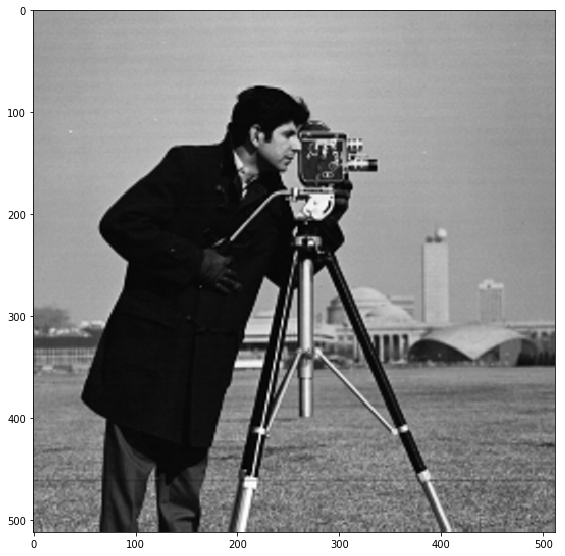

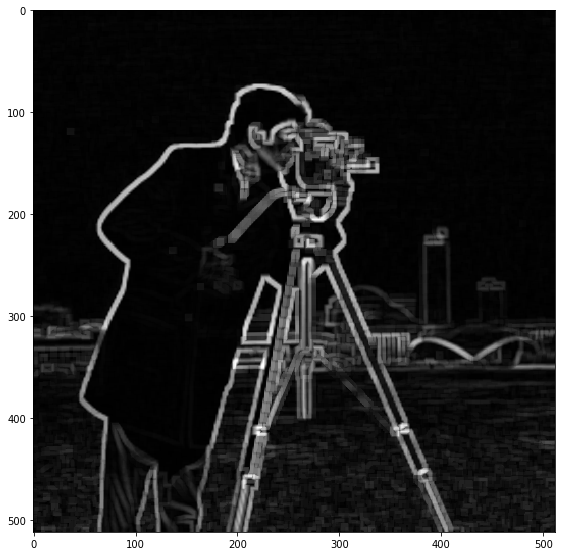

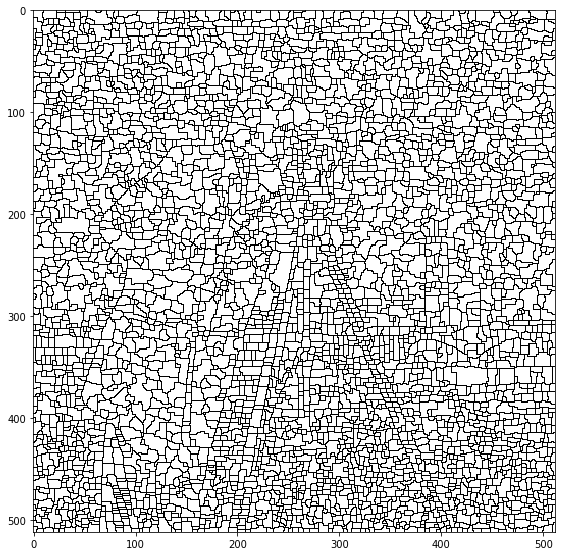

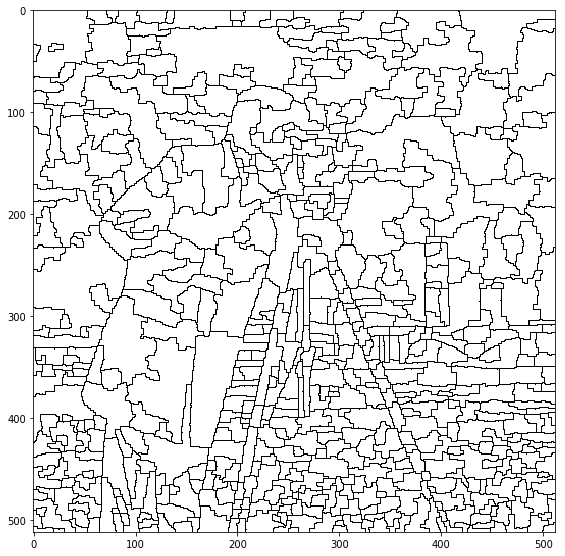

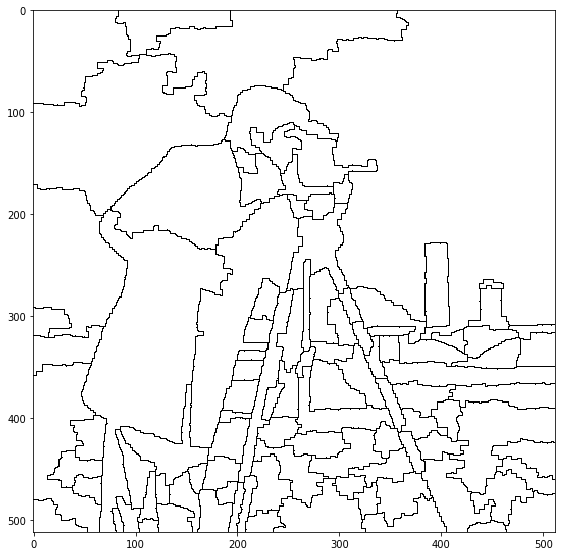

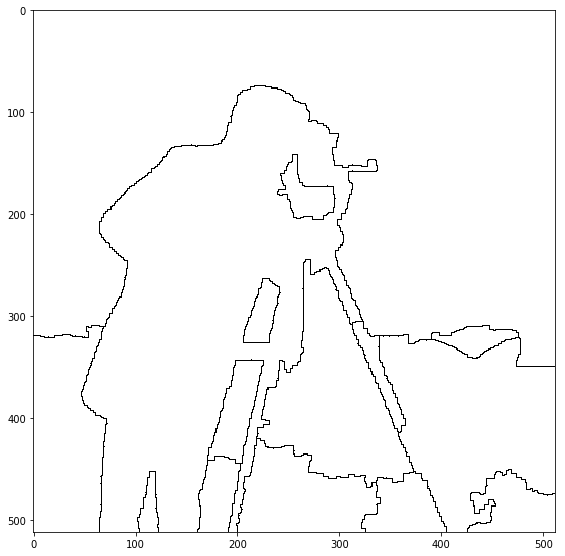

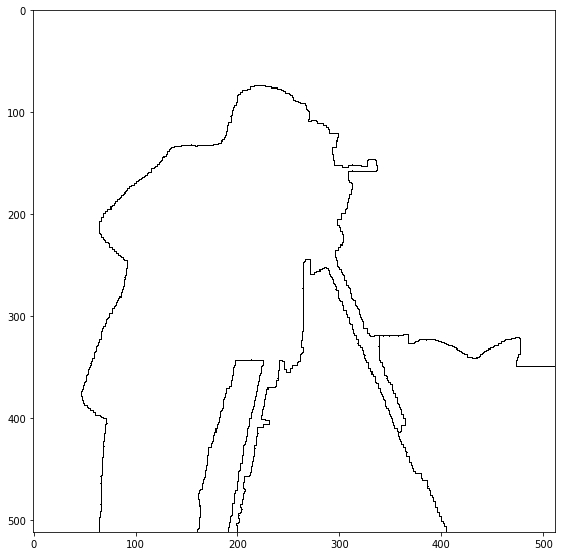

In [3]:
img=cv2.imread('camera.png',0)

figsize = 1.35*img.shape[1] / float(dpi), 1.35*img.shape[0] / float(dpi)

plt.figure(figsize=figsize)
plt.imshow(img,cmap='gray')

method='O3sC3sG5s'
for m in range(0,len(method),3):
    img=morphoFilter(img,method[m:m+3])
    
plt.figure(figsize=figsize)
plt.imshow(img,cmap='gray')

Hierarchies=get_hierSeg_WSarcs_arcRemove(img,nhood=8)
for H in Hierarchies:
    plt.figure(figsize=figsize)
    plt.imshow(H,cmap='gray')
plt.show()